## Project description:
### This is a market research before opening a small robot-run cafe in Los Angeles. The project is promising but expensive, so there is an attempt to attract investors. They’re interested in the current market conditions—the project will chack the ability to maintain  success when the novelty of robot waiters wears off.


#### Step 1. Download the data and prepare it for analysis
#### Download the data on restaurants in LA. Make sure that the data type for each column is correct and that there are no missing values or duplicates. Process them if necessary.
#### I will use data from `rest_data_us.csv`

### Table of contents
1. [Opening data](#start)
2. [Preprocessing data](#preprocessing)
    * [Processing missing values](#null)
    * [Processing duplicate data](#duplicates)
3. [Data analysis](#analysis) 
    * [Types of establishments](#establishments)
    * [Proportions of Chain and Nonchain Establishments](#chain)
    * [Which type of establishment is typically a chain?](#type)
    * [What characterizes chains: many establishments with a small number of seats or a few  with a lot of seats?](#characterizes_chains)
    * [The average number of seats for each type of restaurant](#average)
    * [US address parsing](#usaddress)
    * [Top ten streets by number of restaurants](#top_ten)
    * [The number of streets that only have one restaurant](#one_rest)
    * [Distribution of the number of seats](#distr)
    * [Checking the hypothesis and Pierson correlation coeficient](#hypo)
    * [General conclusion](#general)
    * [Presentation: <link to cloud storage>](#)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import scipy.stats as st


In [2]:
pip install usaddress

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 63 kB 454 kB/s eta 0:00:011
     |████████████████████████████████| 743 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 5.4 MB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=a01b5c057bf8cbcbaf50b78fd39b175b9f2e46ebace02e727a8e76235092a86c
  Stored in directory: /home/jovyan/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import usaddress

<a id="start"></a>

In [4]:
rest_data = pd.read_csv('/datasets/rest_data_us.csv')
rest_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


<a id='preprocessing'></a>

In [5]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [6]:
rest_data.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


In [7]:
#describe categorical values
rest_data.describe(include=[object])

,object_name,address,chain,object_type
count,9651,9651,9648,9651
unique,8672,8517,2,6
top,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant
freq,47,11,5972,7255


In [8]:
rest_data.object_type.value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

In [9]:
rest_data.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

<a id="null"></a>

In [10]:
rest_data.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

#### There are only 3 missing values of 9651 (0.003%) , i will ignore them for a while

<a id="duplicates"></a>

In [11]:
rest_data.duplicated().sum()

0

#### There are no duplicated values

<a id="analysis"></a>

### Step 2. Data analysis

<a id="establishments"></a>

In [12]:
establishments = rest_data.groupby("object_type")["object_name"].count()
establishments

object_type
Bakery         283
Bar            292
Cafe           435
Fast Food     1066
Pizza          320
Restaurant    7255
Name: object_name, dtype: int64

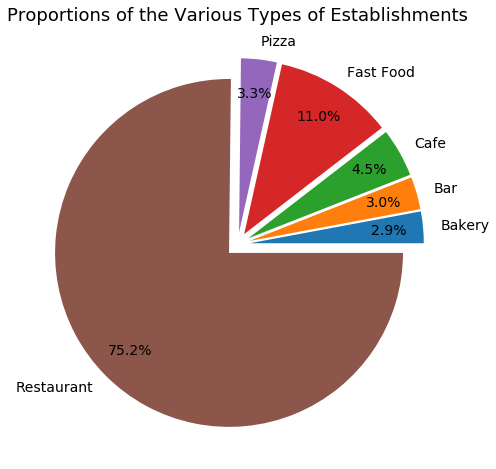

In [13]:
pie, ax = plt.subplots(figsize=[12,8])
labels = establishments.keys()
plt.pie(x=establishments, autopct="%.1f%%",explode=[0.07]*6,  labels=labels,  pctdistance=0.8,textprops={'fontsize': 14})
plt.title("Proportions of the Various Types of Establishments", fontsize=18);

#pie.savefig("DeliveryPieChart.png")

<a id='chain'></a>

In [14]:
chain = rest_data.groupby('chain')["object_name"].count()
chain

chain
False    5972
True     3676
Name: object_name, dtype: int64

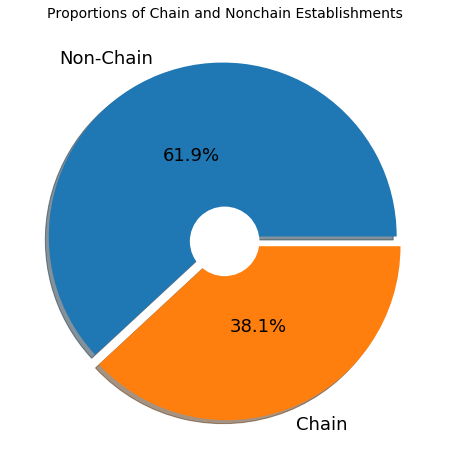

In [15]:
pie, ax = plt.subplots(figsize=[12,8])
labels ='Non-Chain','Chain' 
plt.pie(x=chain, autopct="%.1f%%",explode=[0.03]*2,  labels=labels, shadow=True, pctdistance=0.5,textprops={'fontsize': 18})
plt.title("Proportions of Chain and Nonchain Establishments", fontsize=14);
centre_circle = plt.Circle((0,0),0.20,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#plt.legend()
plt.show()

In [16]:
chain1 = rest_data.groupby('chain').count()
chain1

,id,object_name,address,object_type,number
chain,,,,,
False,5972,5972,5972,5972,5972
True,3676,3676,3676,3676,3676


In [17]:
est = rest_data.groupby("object_type").count()
est

,id,object_name,address,chain,number
object_type,,,,,
Bakery,283,283,283,283,283
Bar,292,292,292,292,292
Cafe,435,435,435,435,435
Fast Food,1066,1066,1066,1066,1066
Pizza,320,320,320,319,320
Restaurant,7255,7255,7255,7253,7255


In [18]:
rest_chain = rest_data.query('chain == True')
rest_chain.head(10)

,id,object_name,address,chain,object_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
15,11801,FOOD COURT TRAY WASHING AREA,928 S WESTERN AVE STE 300,True,Restaurant,21
24,11810,M CAFE DE CHAYA,7119 MELROSE AVE,True,Restaurant,43
27,11813,NORM'S RESTAURANT,470 N LA CIENEGA BLVD,True,Restaurant,80
29,11815,KRISPY KRUNCHY CHICKEN - ALVARADO,600 S ALVARADO ST STE 111C,True,Restaurant,15
31,11817,DUNES RESTAURANT,5625 W SUNSET BLVD,True,Restaurant,118


<a id='type'></a>

#### Which type of establishment is typically a chain?

In [19]:
#pivoting by number of seats
df = pd.pivot_table(rest_data, index='chain', columns='object_type', values='number', aggfunc='sum', fill_value=0)
df.head()

object_type,Bakery,Bar,Cafe,Fast Food,Pizza,Restaurant
chain,,,,,,
False,0,9972,3981,10895,5200,245688
True,6162,3100,6894,23044,3906,102810


In [20]:
#pivoting by number of establishments
df1 = pd.pivot_table(rest_data, index='chain', columns='object_type', values='object_name', aggfunc='count', fill_value=0)
df1.head()

object_type,Bakery,Bar,Cafe,Fast Food,Pizza,Restaurant
chain,,,,,,
False,0,215,169,461,166,4961
True,283,77,266,605,153,2292


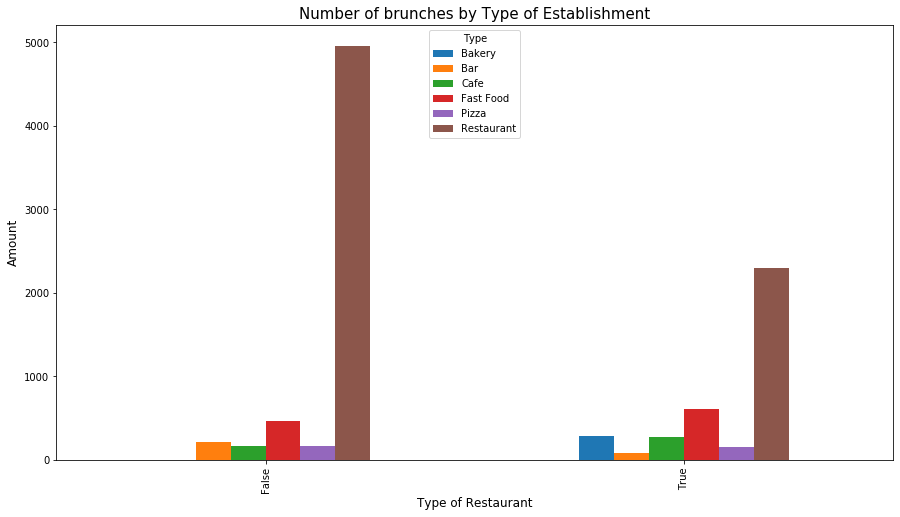

In [21]:
df1.plot(kind='bar', stacked=False,figsize=(15,8))
plt.title('Number of brunches by Type of Establishment', fontsize=15)
plt.xlabel('Type of Restaurant', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(title = 'Type',loc = 'upper center')
plt.show()

In [22]:
#calculate amount of brunches including restaurant
df1['total_brunches'] = df1[['Bakery', 'Bar', 'Cafe', 'Fast Food', 'Pizza', 'Restaurant']].sum(axis=1)
df1

object_type,Bakery,Bar,Cafe,Fast Food,Pizza,Restaurant,total_brunches
chain,,,,,,,
False,0,215,169,461,166,4961,5972
True,283,77,266,605,153,2292,3676


In [23]:
#calculate amount of brunches excluding restaurant
df1['total_brunches'] = df1[['Bakery', 'Bar', 'Cafe', 'Fast Food', 'Pizza']].sum(axis=1)
df1

object_type,Bakery,Bar,Cafe,Fast Food,Pizza,Restaurant,total_brunches
chain,,,,,,,
False,0,215,169,461,166,4961,1011
True,283,77,266,605,153,2292,1384


### In my opinion, Fast Food is typically a chain, either by greater  number of seats or amount of brunches among all establishments

<a id='characterizes_chains'></a>

#### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [24]:
#calculate amount of seats including restaurant
df['total_seats'] = df[['Bakery', 'Bar', 'Cafe', 'Fast Food', 'Pizza', 'Restaurant']].sum(axis=1)
df

object_type,Bakery,Bar,Cafe,Fast Food,Pizza,Restaurant,total_seats
chain,,,,,,,
False,0,9972,3981,10895,5200,245688,275736
True,6162,3100,6894,23044,3906,102810,145916


In [25]:
#calculate amount of seats excluding restaurant
df['total_seats'] = df[['Bakery', 'Bar', 'Cafe', 'Fast Food', 'Pizza']].sum(axis=1)
df

object_type,Bakery,Bar,Cafe,Fast Food,Pizza,Restaurant,total_seats
chain,,,,,,,
False,0,9972,3981,10895,5200,245688,30048
True,6162,3100,6894,23044,3906,102810,43106


### Generaly, chain establishments are characterized by larger number of seats and brunches, excluding restaurants and it makes sense. There are a lot of exclusive restuarants that are nonchained, during their exclusivity.

In [26]:
rest_data.object_name.value_counts().head(10)

THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
WABA GRILL                    14
KENTUCKY FRIED CHICKEN        14
MCDONALD'S                    13
TRIMANA                       13
STARBUCKS                     12
YOGURTLAND                    12
PAPA JOHN'S PIZZA             12
Name: object_name, dtype: int64

<a id='average'></a>

#### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

In [27]:
df3 = pd.pivot_table(rest_data, index='object_type', columns='chain', values='number', aggfunc='mean', fill_value=0)
df3.round()

chain,False,True
object_type,,
Bakery,0.0,22.0
Bar,46.0,40.0
Cafe,24.0,26.0
Fast Food,24.0,38.0
Pizza,31.0,26.0
Restaurant,50.0,45.0


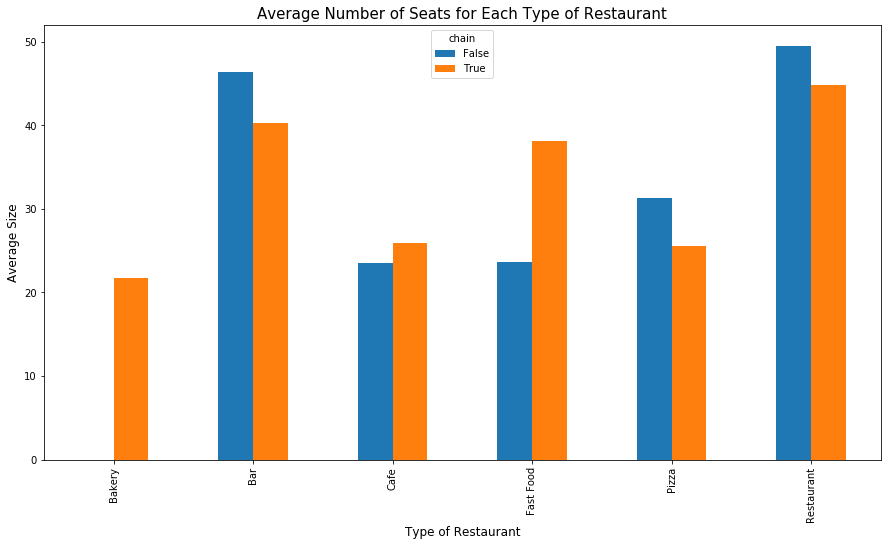

In [28]:
#df3 = df3.div(df3.sum(1), axis=0)
df3.plot(kind='bar', stacked=False, figsize=(15,8))
plt.title('Average Number of Seats for Each Type of Restaurant', fontsize=15)
plt.xlabel('Type of Restaurant', fontsize=12)
plt.ylabel('Average Size', fontsize=12)
plt.legend(title = 'chain',loc = 'upper center')
plt.show()

### Restuarant has the greatest number of seats 

<a id='usaddress'></a>

#### Put the data on street names from the `address` column in a separate column.


In [65]:
rest_data.head()

,id,object_name,address,chain,object_type,number,clean_street_check,clean_street_final
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,"3708,ROCK","3708 ROCK, Los Angeles,USA"
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,"100,WORLD","100 WORLD, Los Angeles,USA"
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,"6801,HOLLYWOOD","6801 HOLLYWOOD, Los Angeles,USA"
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,"1814,SUNSET","1814 SUNSET, Los Angeles,USA"
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,"2100,PARK","2100 PARK, Los Angeles,USA"


In [30]:
street_example=rest_data.iloc[0]['address']
street_example

'3708 N EAGLE ROCK BLVD'

In [31]:
usaddress.parse(street_example)

[('3708', 'AddressNumber'),
 ('N', 'StreetNamePreDirectional'),
 ('EAGLE', 'StreetName'),
 ('ROCK', 'StreetName'),
 ('BLVD', 'StreetNamePostType')]

In [32]:
raw_address=usaddress.parse(street_example)
raw_address

[('3708', 'AddressNumber'),
 ('N', 'StreetNamePreDirectional'),
 ('EAGLE', 'StreetName'),
 ('ROCK', 'StreetName'),
 ('BLVD', 'StreetNamePostType')]

In [33]:
#create a new dictionary. Iterate over a list with components. So we just say: For each component in raw_address
#save component's name as key (i[1]) and component itself as value of the dictionary (i[0])
dict_address={}
for i in raw_address:
    dict_address.update({i[1]:i[0]})


In [34]:
dict_address

{'AddressNumber': '3708',
 'StreetNamePreDirectional': 'N',
 'StreetName': 'ROCK',
 'StreetNamePostType': 'BLVD'}

In [35]:
#Now we have a dictionary with our component of the street and we can deconstruct the street in any way we want.
#For example, we want only street name and number
dict_address['StreetName']+','+dict_address['AddressNumber']

'ROCK,3708'

In [36]:
def cleaning_1(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
    return clean_adress

In [37]:
rest_data.address.sample(5).apply(cleaning_1)

901          8837,PICO
4628     11104,OLYMPIC
2890           126,6TH
3004        1655,103RD
8001    5150,HOLLYWOOD
Name: address, dtype: object

In [38]:
def cleaning_check(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    #this line below checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'])
        return clean_adress
    else:
        return 'no street or number'


In [39]:
rest_data['clean_street_check']=rest_data.address.apply(cleaning_check)

In [40]:
rest_data[rest_data['clean_street_check']=='no street or number']


,id,object_name,address,chain,object_type,number,clean_street_check
1888,13674,MAGDALENO DEBBIE,OLVERA ST E17,False,Restaurant,15,no street or number
3719,15505,LAS ANITAS,OLVERA ST 26,False,Restaurant,38,no street or number
7003,18789,D.K. DONUTS,1033 1/2 LOS ANGELES ST,False,Fast Food,8,no street or number
7281,19067,CIELITO LINDO,OLVERA ST 23,False,Restaurant,2,no street or number
7319,19105,JUANITA'S CAFE,OLVERA ST 20,False,Restaurant,12,no street or number
7321,19107,KITTY'S SNOW CONES,OLVERA ST 2,False,Restaurant,11,no street or number
7327,19113,LA NOCHE BUENA,OLVERA ST E8,False,Restaurant,1,no street or number
7438,19224,LA GOLONDRINA,OLVERA ST W17,False,Restaurant,204,no street or number
7741,19527,RODOLFO'S RESTAURANT,OLVERA ST 5,True,Restaurant,4,no street or number


In [41]:
usaddress.parse(rest_data.iloc[1888]['address'])

[('OLVERA', 'PlaceName'), ('ST', 'StateName'), ('E17', 'ZipCode')]

In [42]:
def cleaning_final(raw):
    if raw.startswith('OLVERA'):
        clean_adress='OLVERA,Los Angeles,USA'
    elif raw.startswith('1033 1/2 LOS ANGELES'):
        clean_adress='1033 1/2 LOS ANGELES ST,Los Angeles,USA'
    else:
        raw_address=usaddress.parse(raw)
        dict_address={}
        for i in raw_address:
            dict_address.update({i[1]:i[0]})
        clean_adress=dict_address['AddressNumber']+" "+str(dict_address['StreetName'])+str(', Los Angeles,USA')
    return clean_adress


In [43]:
rest_data['clean_street_final']=rest_data.address.apply(cleaning_final)
rest_data.sample(10)


,id,object_name,address,chain,object_type,number,clean_street_check,clean_street_final
1083,12869,PALIKAO,130 E 6TH ST,False,Restaurant,27,"130,6TH","130 6TH, Los Angeles,USA"
4491,16277,DAVES DELI,213 S MEDNIK AVE,True,Restaurant,31,"213,MEDNIK","213 MEDNIK, Los Angeles,USA"
9168,20954,WOKCANO EXPRESS,2904 S FIGUEROA ST,False,Fast Food,41,"2904,FIGUEROA","2904 FIGUEROA, Los Angeles,USA"
6580,18366,HOLLY GROUNDS COFFEE ANDTEA,5371 ALHAMBRA AVE,False,Cafe,11,"5371,ALHAMBRA","5371 ALHAMBRA, Los Angeles,USA"
2043,13829,LA SALSA - PICO,11077 W PICO BLVD,False,Restaurant,22,"11077,PICO","11077 PICO, Los Angeles,USA"
2591,14377,EBISU JAPANESE GRILL & SUSHI,6234 WILSHIRE BLVD,False,Restaurant,32,"6234,WILSHIRE","6234 WILSHIRE, Los Angeles,USA"
2218,14004,OTIS COLLEGE,9030 S LOYOLA BLVD,False,Restaurant,146,"9030,LOYOLA","9030 LOYOLA, Los Angeles,USA"
3370,15156,PONCES BAKERY,757 S FETTERLY AVE STE #101,True,Bakery,22,"757,FETTERLY","757 FETTERLY, Los Angeles,USA"
4105,15891,NERI'S BAKERY & FAST FOOD,3377 WILSHIRE BLVD # A1,True,Bakery,26,"3377,WILSHIRE","3377 WILSHIRE, Los Angeles,USA"
3756,15542,OSTERIA MAMMA,5730 MELROSE AVE,False,Restaurant,125,"5730,MELROSE","5730 MELROSE, Los Angeles,USA"


<a id='top_ten'></a>

#### Plot a graph of the top ten streets by number of restaurants.


In [44]:
top_ten = rest_data[['clean_street_final', 'object_name']].groupby('clean_street_final').count().sort_values(by='clean_street_final').reset_index()
top_ten

,clean_street_final,object_name
0,"00936 MAPLE, Los Angeles,USA",1
1,"01253 VINE, Los Angeles,USA",1
2,"03742 FLOWER, Los Angeles,USA",1
3,"05358 WILSHIRE, Los Angeles,USA",1
4,"0800 6TH, Los Angeles,USA",1
...,...,...
6514,"9901 WASHINGTON, Los Angeles,USA",1
6515,"9914 BROADWAY, Los Angeles,USA",1
6516,"9919 AVALON, Los Angeles,USA",1
6517,"998 ROBERTSON, Los Angeles,USA",2


In [45]:
top_ten = top_ten.nlargest(10,['object_name'])
top_ten

,clean_street_final,object_name
125,"10250 MONICA, Los Angeles,USA",63
5243,"6333 3RD, Los Angeles,USA",63
3549,"380 WORLD, Los Angeles,USA",38
5449,"6801 HOLLYWOOD, Los Angeles,USA",34
2989,"317 BROADWAY, Los Angeles,USA",33
3305,"3500 6TH, Los Angeles,USA",30
6400,"928 WESTERN, Los Angeles,USA",26
3723,"404 FIGUEROA, Los Angeles,USA",25
1780,"189 GROVE, Los Angeles,USA",22
3148,"333 ALAMEDA, Los Angeles,USA",22


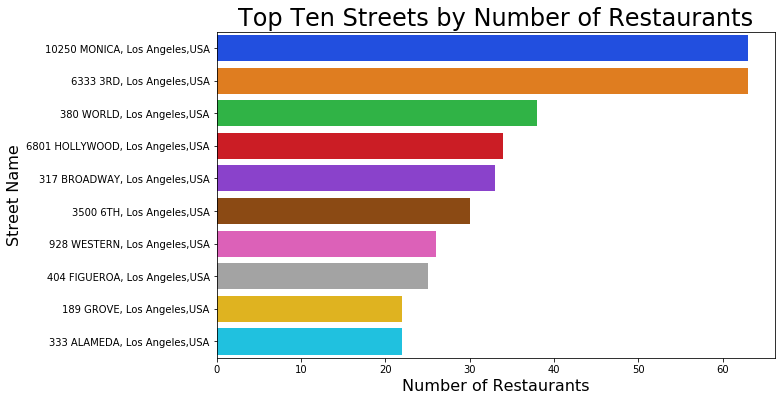

In [46]:
sns.set_palette("bright")
plt.figure(figsize=(10,6))
ax = sns.barplot(y="clean_street_final", x="object_name", data=top_ten)
plt.title("Top Ten Streets by Number of Restaurants", size=24)
plt.xlabel("Number of Restaurants", size=16)
plt.ylabel("Street Name", size=16)
plt.show()

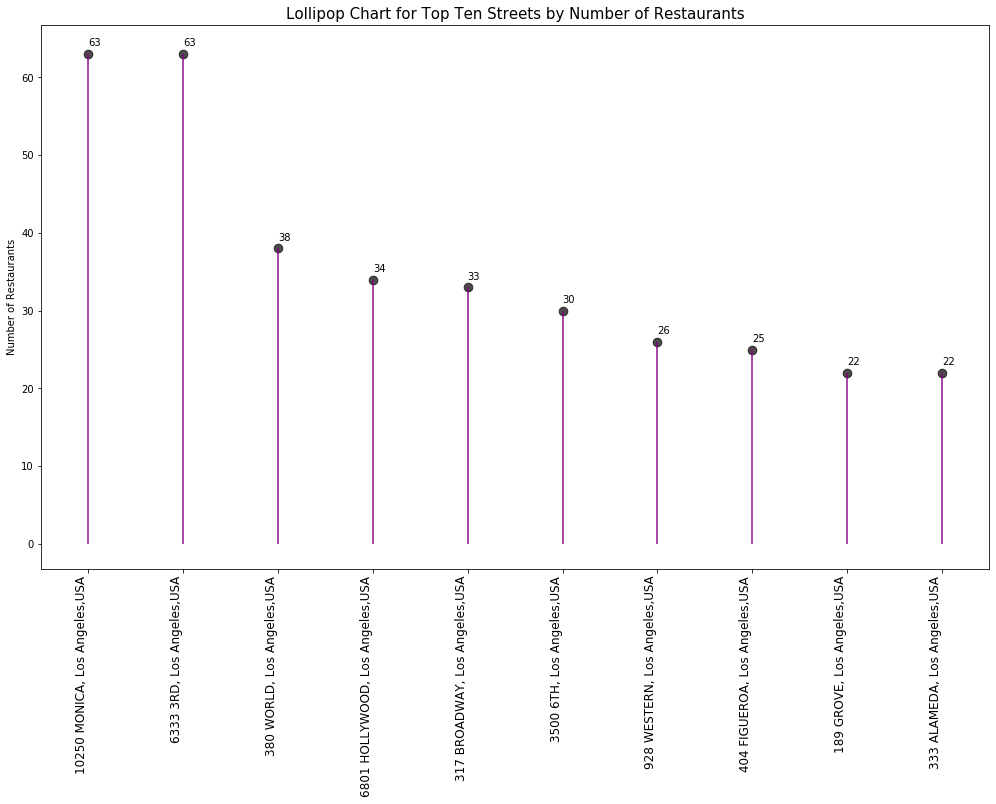

In [47]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=top_ten.clean_street_final, ymin=0, ymax=top_ten.object_name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=top_ten.clean_street_final, y=top_ten.object_name, s=75,color='black', alpha=0.7)
#set title, labels and ticks
ax.set_title('Lollipop Chart for Top Ten Streets by Number of Restaurants', fontdict={'size':15})
ax.set_ylabel('Number of Restaurants')
ax.set_xticks(top_ten.clean_street_final)
ax.set_xticklabels(top_ten.clean_street_final, rotation=90, fontdict={'horizontalalignment':'right', 'size':12})
#make iterable labels for dots
for row in top_ten.itertuples():
    ax.text(row.clean_street_final, row.object_name+1,s=round(row.object_name,2))

<a id='one_rest'></a>

#### Find the number of streets that only have one restaurant.


In [48]:
one_rest = rest_data[['clean_street_final', 'object_name']].groupby('clean_street_final').count().sort_values(by='clean_street_final').reset_index()
one_rest


,clean_street_final,object_name
0,"00936 MAPLE, Los Angeles,USA",1
1,"01253 VINE, Los Angeles,USA",1
2,"03742 FLOWER, Los Angeles,USA",1
3,"05358 WILSHIRE, Los Angeles,USA",1
4,"0800 6TH, Los Angeles,USA",1
...,...,...
6514,"9901 WASHINGTON, Los Angeles,USA",1
6515,"9914 BROADWAY, Los Angeles,USA",1
6516,"9919 AVALON, Los Angeles,USA",1
6517,"998 ROBERTSON, Los Angeles,USA",2


In [49]:
one_rest = one_rest.query('object_name == 1')
one_rest.count()

clean_street_final    5086
object_name           5086
dtype: int64

### There are 5086 streets that only have one restaurant

<a id='distr'></a>

#### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

In [50]:
#dist = rest_data[['clean_street_final', 'object_name', 'number']].groupby('clean_street_final').count().sort_values(by='clean_street_final').reset_index()
#dist.head(10)

In [51]:
rests_seats = rest_data.groupby(['clean_street_final', 'object_type', 'chain'])['number'].agg(['count','sum'])
rests_seats.columns = ['rests','seats']
rests_seats

rests  seats
clean_street_final              object_type chain              
00936 MAPLE, Los Angeles,USA    Restaurant  False      1     21
01253 VINE, Los Angeles,USA     Restaurant  True       1     29
03742 FLOWER, Los Angeles,USA   Restaurant  False      1     39
05358 WILSHIRE, Los Angeles,USA Restaurant  False      1    113
0800 6TH, Los Angeles,USA       Restaurant  True       1    195
...                                                  ...    ...
9919 AVALON, Los Angeles,USA    Fast Food   True       1     13
998 ROBERTSON, Los Angeles,USA  Restaurant  False      1    148
                                            True       1     62
OLVERA,Los Angeles,USA          Restaurant  False      7    283
                                            True       1      4

[7673 rows x 2 columns]

In [53]:
lot_rest = rests_seats.query('rests > 10')
not_lot_rest = rests_seats.query('rests < 10')
lot_rest.pivot_table(index='rests', values='seats').round()


,seats
rests,
11,386.0
12,637.0
13,510.0
14,254.0
15,544.0
16,608.0
17,316.0
18,1409.0
20,1645.0


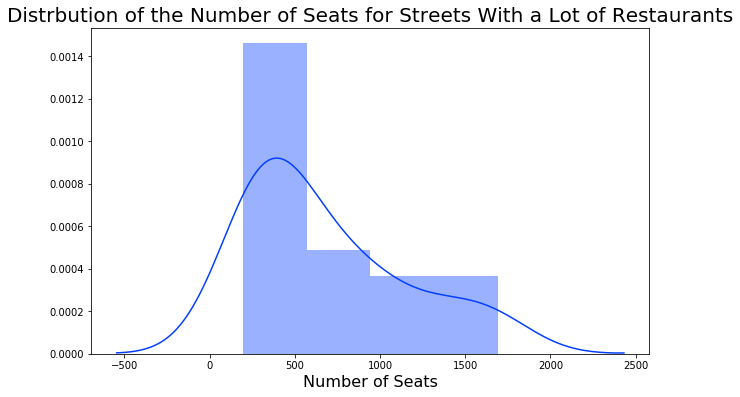

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(lot_rest['seats'])
plt.title('Distrbution of the Number of Seats for Streets With a Lot of Restaurants',fontsize=20)
plt.xlabel("Number of Seats", size=16)

plt.show()

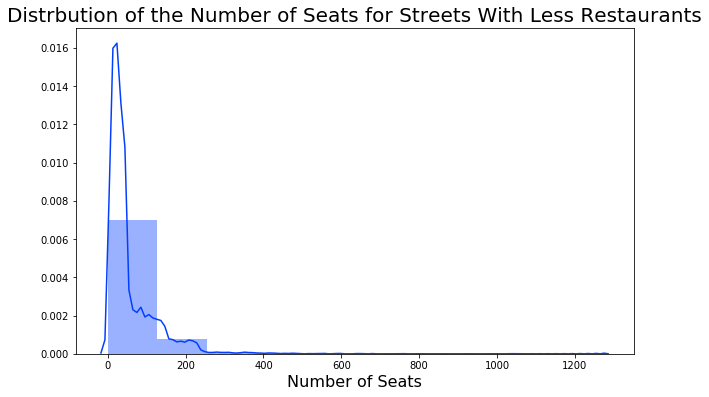

In [56]:
plt.figure(figsize=(10,6))
sns.distplot(not_lot_rest['seats'],bins=10)
plt.title('Distrbution of the Number of Seats for Streets With Less Restaurants',fontsize=20)
plt.xlabel("Number of Seats", size=16)
plt.show()

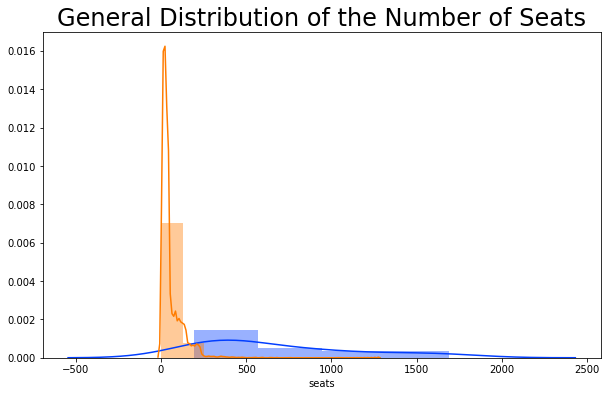

In [57]:
plt.figure(figsize=(10,6))
plt.title("General Distribution of the Number of Seats", size=24)
#plt.legend()
sns.distplot(lot_rest['seats'])
sns.distplot(not_lot_rest['seats'],bins=10)
plt.ylim(0, 0.017)
plt.show()

<a id='hypo'></a>

#### The NULL hypothesis Hₒ:  The number of seats on streets with a lot of restaurants and few restaurants  is equall  ( because H₀ is always stated with an equal sign).      The alternative hypothesis, H₁, is based on H₀. For this H₀, H₁ would be: There is a difference between groups in number of seats. For not-normal distribution I will use Mann-Whitney test.

In [58]:
alpha = .05 #significance level
results = st.mannwhitneyu(lot_rest, not_lot_rest)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

p-value:  8.695155816726997e-83
Null hypothesis rejected: the difference is statistically significant


In [59]:
lot_rest.seats.mean()

681.1363636363636

In [60]:
not_lot_rest.seats.mean()

52.96142278017523

#### We can see that there is a trend of much more seats on streets with a lot of restaurants

In [64]:
#Pearson correlation coefficient
corelation = (rests_seats['rests'].corr(rests_seats['seats']))
corelation.round(2)

0.62

#### There is a moderate positive relationship of 0.62 between number of restaurants and number of seats

<a id='general'></a>

## General conclusion
#### Analyzing open-source data on restaurants in LA, we can see that there are 9651 food establishments, when restaurants' share is 75.2%, fast food 11%, cafe 4.5%(435 cafes), pizza 3.3%, bar 3% and bakery 2.9%.  Chain and non-chain establishments are dividet to 38.1% and 61.9% respectively. Fast food is typically chain representive, either by large number of seats or establishments. Despite of chain defenition, there is an exeption: there is more nonchained restaurants and itmakes sense, during restaurant's exclusivity. Also, an average number of seats is the biggest in restaurants: 45 in chain and 50 non-chain. Top 5 streets with the largest amount of establishments are: Monica - 63, 3rd street - 63, World - 38, Hollywood - 34, Broadway - 33. There are more than 50,000 streets in Los Angeles (according www.la.curbed.com) and 5,086 streets with only 1 food establishment. The hypothesis "The number of seats on streets with a lot of restaurants and few restaurants  is equall" was rejected by Mann-Whitney test, which defined that the difference is statistically significant. In addition, examing the Pierson correlation coefficient, there is a moderate positive relationship of 0.62 between number of restaurants and number of seats.
#### A relatively small number of Cafe's (169 non-chained) spurn us to open an unique small robot-run Cafe.